# DRINKING WATER
This notebook will be used to measure indicators for EDGI/EEW's 'state of the environment report.'
It is based on the NJ SDWA EJ notebook and the SOE report notebooks for other environmental media/pollutants.

In [1]:
# import libraries
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

# SDWA Safe Drinking Water Act

In [2]:
# Load facilities data into notebook
path = r"C:\Users\jenni\Workspaces\Projects\EDGI\SOE Report\Data\sdwa\SDWA_latest_downloads\SDWA_PUB_WATER_SYSTEMS.csv"
sdwa_pws = pd.read_csv(path)
print(len(sdwa_pws))

C:\Users\jenni\AppData\Local\Temp\ipykernel_19284\4049717517.py:3: DtypeWarning: Columns (11,30,32,33,34,43,44,45,46,47,48,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  sdwa_pws = pd.read_csv(path)


431754


In [3]:
# Filter to include only active systems
sdwa_pws = sdwa_pws[sdwa_pws['PWS_ACTIVITY_CODE'] == 'A']
# total number of active PWS
print(len(sdwa_pws))

143385


In [4]:
# summarize PWS by type
sdwa_pws['PWS_TYPE_CODE'].value_counts()

PWS_TYPE_CODE
TNCWS     76822
CWS       49413
NTNCWS    17150
Name: count, dtype: int64

In [ ]:
# Load Violations data into notebook
# File is too large to load in entirety so only load selected columns
path = r"C:\Users\jenni\Workspaces\Projects\EDGI\SOE Report\Data\sdwa\SDWA_latest_downloads\SDWA_VIOLATIONS_ENFORCEMENT.csv"
sdwa_viols = pd.read_csv(path,
                         usecols=['PWSID', 
                                  'VIOLATION_ID', 
                                  'VIOLATION_CODE',
                                  'VIOLATION_CATEGORY_CODE', 
                                  'IS_HEALTH_BASED_IND',
                                  'CONTAMINANT_CODE', 
                                  'RULE_CODE',
                                  'NON_COMPL_PER_BEGIN_DATE', 
                                  'NON_COMPL_PER_END_DATE',
                                  'VIOL_FIRST_REPORTED_DATE', 
                                  'VIOL_LAST_REPORTED_DATE',
                                  'ENFORCEMENT_ID',
                                  'ENFORCEMENT_DATE', 
                                  'ENFORCEMENT_ACTION_TYPE_CODE',
                                  'ENF_ACTION_CATEGORY', 
                                  'ENF_ORIGINATOR_CODE',
                                  'ENF_FIRST_REPORTED_DATE', 
                                  'ENF_LAST_REPORTED_DATE'
                                  ],
                         parse_dates=['NON_COMPL_PER_BEGIN_DATE', 
                                      'NON_COMPL_PER_END_DATE', 
                                      'VIOL_FIRST_REPORTED_DATE', 
                                      'VIOL_LAST_REPORTED_DATE',
                                      'ENFORCEMENT_DATE',
                                      'ENF_FIRST_REPORTED_DATE', 
                                      'ENF_LAST_REPORTED_DATE'
                                     ]
                        )
print(len(sdwa_viols))

In [6]:
# Check date fields for format and null values
print("Number of records with Null NON_COMPL_PER_BEGIN_DATE = " + str(len(sdwa_viols[sdwa_viols['NON_COMPL_PER_BEGIN_DATE'].isna()]==True)))
print("Number of records with Null NON_COMPL_PER_END_DATE = " + str(len(sdwa_viols[sdwa_viols['NON_COMPL_PER_END_DATE'].isna()]==True)))
print("Number of records with Null VIOL_FIRST_REPORTED_DATE = " + str(len(sdwa_viols[sdwa_viols['VIOL_FIRST_REPORTED_DATE'].isna()]==True)))
print("Number of records with Null VIOL_LAST_REPORTED_DATE = " + str(len(sdwa_viols[sdwa_viols['VIOL_LAST_REPORTED_DATE'].isna()]==True)))
print("Number of records with Null ENFORCEMENT_DATE = " + str(len(sdwa_viols[sdwa_viols['ENFORCEMENT_DATE'].isna()]==True)))
print("Number of records with Null ENF_FIRST_REPORTED_DATE = " + str(len(sdwa_viols[sdwa_viols['ENF_FIRST_REPORTED_DATE'].isna()]==True)))
print("Number of records with Null ENF_LAST_REPORTED_DATE = " + str(len(sdwa_viols[sdwa_viols['ENF_LAST_REPORTED_DATE'].isna()]==True)))

Number of records with Null NON_COMPL_PER_BEGIN_DATE = 998473
Number of records with Null NON_COMPL_PER_END_DATE = 998473
Number of records with Null VIOL_FIRST_REPORTED_DATE = 998482
Number of records with Null VIOL_LAST_REPORTED_DATE = 1093696
Number of records with Null ENFORCEMENT_DATE = 489461
Number of records with Null ENF_FIRST_REPORTED_DATE = 489464
Number of records with Null ENF_LAST_REPORTED_DATE = 906070


In [7]:
print(type(sdwa_viols['NON_COMPL_PER_END_DATE'].loc[1]))
print(type(sdwa_viols['NON_COMPL_PER_BEGIN_DATE'].loc[1]))
print(type(sdwa_viols['VIOL_FIRST_REPORTED_DATE'].loc[1]))
print(type(sdwa_viols['VIOL_LAST_REPORTED_DATE'].loc[1]))
print(type(sdwa_viols['ENFORCEMENT_DATE'].loc[1]))
print(type(sdwa_viols['ENF_FIRST_REPORTED_DATE'].loc[1]))
print(type(sdwa_viols['ENF_LAST_REPORTED_DATE'].loc[1]))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [8]:
# NON_COMPL_PER_END_DATE did not convert to timestamp
# why? some rows contain arrows >:|
sdwa_viols[sdwa_viols['NON_COMPL_PER_END_DATE']=='--->']

,PWSID,VIOLATION_ID,NON_COMPL_PER_BEGIN_DATE,NON_COMPL_PER_END_DATE,VIOLATION_CODE,VIOLATION_CATEGORY_CODE,IS_HEALTH_BASED_IND,CONTAMINANT_CODE,RULE_CODE,VIOL_FIRST_REPORTED_DATE,VIOL_LAST_REPORTED_DATE,ENFORCEMENT_ID,ENFORCEMENT_DATE,ENFORCEMENT_ACTION_TYPE_CODE,ENF_ACTION_CATEGORY,ENF_ORIGINATOR_CODE,ENF_FIRST_REPORTED_DATE,ENF_LAST_REPORTED_DATE
231,10307001,0307001343014122015,2015-12-01,--->,34,MR,N,3014.0,140.0,2024-10-07,2024-12-23,0307001IA04011622810,2016-04-01,EIA,Informal,R,2024-10-07,2024-12-23
232,10307001,0307001343014122015,2015-12-01,--->,34,MR,N,3014.0,140.0,2024-10-07,2024-12-23,0307001IE04011622812,2016-04-01,EIE,Informal,R,2024-10-07,2024-12-23
233,10307001,0307001343014122015,2015-12-01,--->,34,MR,N,3014.0,140.0,2024-10-07,2024-12-23,0307001IF06301622814,2016-06-30,EIF,Informal,R,2024-10-07,2024-12-23
234,10307001,030700134301462016,2016-06-01,--->,34,MR,N,3014.0,140.0,2024-10-07,2024-12-23,0307001IA10311622825,2016-10-31,EIA,Informal,R,2024-10-07,2024-12-23
235,10307001,030700134301462016,2016-06-01,--->,34,MR,N,3014.0,140.0,2024-10-07,2024-12-23,0307001IE10311622826,2016-10-31,EIE,Informal,R,2024-10-07,2024-12-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13666514,PA2520092,2322080,2023-04-11,--->,75,Other,N,7500.0,410.0,2023-06-15,2024-11-22,NaN,NaT,NaN,NaN,NaN,NaT,NaT
13666515,PA2520092,2400802,2023-10-11,--->,75,Other,N,7500.0,410.0,2024-02-23,2024-11-22,NaN,NaT,NaN,NaN,NaN,NaT,NaT
13666519,PA2520091,2300441,2022-10-11,--->,75,Other,N,7500.0,410.0,2023-02-15,2024-11-22,NaN,NaT,NaN,NaN,NaN,NaT,NaT
13666525,PA2520092,2314007,2023-01-11,--->,75,Other,N,7500.0,410.0,2023-03-16,2024-11-22,NaN,NaT,NaN,NaN,NaN,NaT,NaT


In [9]:
# drop the 81,239 rows with arrows for now 
# find out what these arrows mean later
sdwa_viols.drop(sdwa_viols.index[sdwa_viols['NON_COMPL_PER_END_DATE'] == '--->'], inplace = True)

In [10]:
# convert to datetime 
sdwa_viols['NON_COMPL_PER_END_DATE'] = pd.to_datetime(sdwa_viols['NON_COMPL_PER_END_DATE'], format='mixed')
print(type(sdwa_viols['NON_COMPL_PER_END_DATE'].loc[1]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [11]:
# Filter violations to those occurring in 2001 or later
sdwa_viols = sdwa_viols[sdwa_viols['NON_COMPL_PER_BEGIN_DATE']>'12-31-2000']
print(len(sdwa_viols))

10100176


In [12]:
# Merge violations data with filtered PWS list to restrict V&E data to active PWSs
pws_viols = sdwa_viols.merge(sdwa_pws, left_on='PWSID', right_on='PWSID')
print(len(pws_viols))
pws_viols.head()

7663379


,PWSID,VIOLATION_ID,NON_COMPL_PER_BEGIN_DATE,NON_COMPL_PER_END_DATE,VIOLATION_CODE,VIOLATION_CATEGORY_CODE,IS_HEALTH_BASED_IND,CONTAMINANT_CODE,RULE_CODE,VIOL_FIRST_REPORTED_DATE,...,LAST_REPORTED_DATE,STATE_CODE,SOURCE_WATER_PROTECTION_CODE,SOURCE_PROTECTION_BEGIN_DATE,OUTSTANDING_PERFORMER,OUTSTANDING_PERFORM_BEGIN_DATE,REDUCED_RTCR_MONITORING,REDUCED_MONITORING_BEGIN_DATE,REDUCED_MONITORING_END_DATE,SEASONAL_STARTUP_SYSTEM
0,105314113,0120007,2001-01-01,2001-01-31,22,MCL,Y,3100.0,110.0,2001-04-07,...,11/15/2024,WA,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,105314113,0130056,2001-06-01,2001-06-30,22,MCL,Y,3100.0,110.0,2001-08-29,...,11/15/2024,WA,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,105314113,0130057,2001-07-01,2002-09-30,71,Other,N,7000.0,420.0,2001-08-29,...,11/15/2024,WA,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,105314113,0130057,2001-07-01,2002-09-30,71,Other,N,7000.0,420.0,2001-08-29,...,11/15/2024,WA,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,105314113,0130057,2001-07-01,2002-09-30,71,Other,N,7000.0,420.0,2001-08-29,...,11/15/2024,WA,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Map the field descriptions for various data codes using the data dictionary

# Read ref codes dictionary
path = r"C:\Users\jenni\Workspaces\Projects\EDGI\SOE Report\Data\sdwa\SDWA_latest_downloads\SDWA_REF_CODE_VALUES.csv"
sdwa_ref_codes = pd.read_csv(path)

# violation codes
violations = sdwa_ref_codes.loc[sdwa_ref_codes["VALUE_TYPE"]=='VIOLATION_CODE'].set_index("VALUE_CODE")[["VALUE_DESCRIPTION"]].to_dict()["VALUE_DESCRIPTION"]
pws_viols['VIOLATION_CODE'] = pws_viols['VIOLATION_CODE'].astype(str).map(violations)

# violation category codes
violation_categories = sdwa_ref_codes.loc[sdwa_ref_codes["VALUE_TYPE"]=='VIOLATION_CATEGORY_CODE'].set_index("VALUE_CODE")[["VALUE_DESCRIPTION"]].to_dict()["VALUE_DESCRIPTION"]
pws_viols['VIOLATION_CATEGORY_CODE'] = pws_viols['VIOLATION_CATEGORY_CODE'].astype(str).map(violation_categories)

# rule codes
rules = sdwa_ref_codes.loc[sdwa_ref_codes["VALUE_TYPE"]=='RULE_CODE'].set_index("VALUE_CODE")[["VALUE_DESCRIPTION"]].to_dict()["VALUE_DESCRIPTION"]
pws_viols['RULE_CODE'] = pws_viols['RULE_CODE'].astype(int).astype(str).map(rules) # some of these imported as floats so have to convert to int then string to avoid losing data

# contaminant codes
# note: There are no NaNs in the contaminant codes field in the imported data but after mapping there are 47 NaNs
contaminants = sdwa_ref_codes.loc[sdwa_ref_codes["VALUE_TYPE"]=='CONTAMINANT_CODE'].set_index("VALUE_CODE")[["VALUE_DESCRIPTION"]].to_dict()["VALUE_DESCRIPTION"]
pws_viols['CONTAMINANT_CODE'] = pws_viols['CONTAMINANT_CODE'].dropna().astype(str).map(contaminants) # some of these imported as floats so have to convert to int then string to avoid losing data

# enforcement action type codes
enforcement_action_types = sdwa_ref_codes.loc[sdwa_ref_codes["VALUE_TYPE"]=='ENFORCEMENT_ACTION_TYPE_CODE'].set_index("VALUE_CODE")[["VALUE_DESCRIPTION"]].to_dict()["VALUE_DESCRIPTION"]
pws_viols['ENFORCEMENT_ACTION_TYPE_CODE'] = pws_viols['ENFORCEMENT_ACTION_TYPE_CODE'].astype(str).map(enforcement_action_types)

In [14]:
# create a column in the df to store just the year of the non compliance date
pws_viols['Year'] = pws_viols['NON_COMPL_PER_BEGIN_DATE'].dt.year
# create a column in the df to store the duration of noncompliance using the non-compliance begin/end fields
pws_viols['non_compl_duration'] = pws_viols['NON_COMPL_PER_END_DATE'] - pws_viols['NON_COMPL_PER_BEGIN_DATE']
# create a column in the df to store the duration of noncompliance using the violation first/last reported fields
pws_viols['viol_report_duration'] = pws_viols['VIOL_LAST_REPORTED_DATE'] - pws_viols['VIOL_FIRST_REPORTED_DATE']
# create a column in the df to store the duration of time between noncompliance and enforcement
pws_viols['viol_enf_duration'] = pws_viols['ENF_FIRST_REPORTED_DATE'] - pws_viols['VIOL_FIRST_REPORTED_DATE']
# create a column in the df to store the duration of enforcement opening and closing
pws_viols['enf_report_duration'] = pws_viols['ENF_LAST_REPORTED_DATE'] - pws_viols['ENF_FIRST_REPORTED_DATE']

## Create formatted and filtered dfs for analysis

In [15]:
# df of active pws, all violation types
# pws_viols

In [16]:
# df of active pws, only health viols
pws_viols_health = pws_viols[pws_viols['IS_HEALTH_BASED_IND']=='Y']

In [17]:
# df of active cws, only health viols
cws_viols_health = pws_viols_health[pws_viols_health['PWS_TYPE_CODE']=='CWS']

# Violations

## Number of violations (any type) per year

Text(11.472222222222216, 0.5, 'Number of Violations')

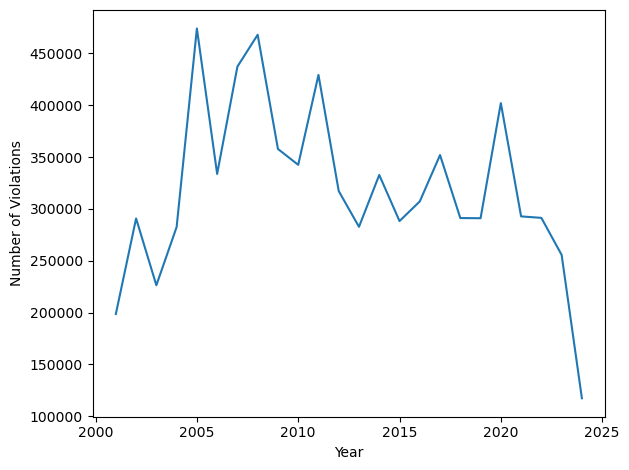

In [18]:
# make a plot of violation categories by year
sns.lineplot(data=pws_viols.groupby(['Year']).count(), x='Year', y='VIOLATION_ID')
plt.tight_layout()
plt.ylabel('Number of Violations')
#plt.savefig('num_viols_by_year.png')

## Percentage of violations that were health-based by year

Text(46.972222222222214, 0.5, 'Percent Violations Health-Based')

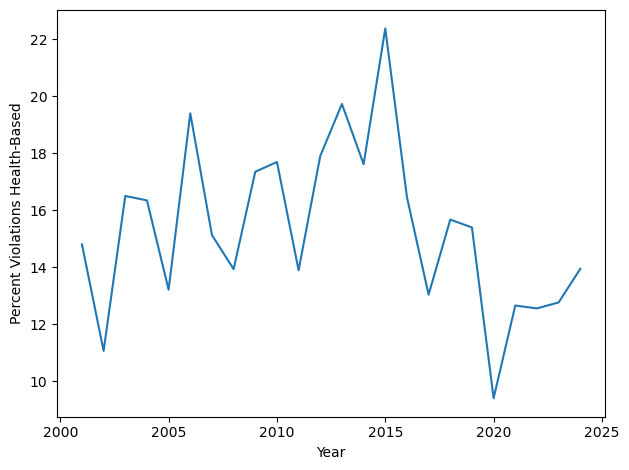

In [19]:
per_health_based = pd.DataFrame((pws_viols.groupby(['Year', 'IS_HEALTH_BASED_IND'])[['VIOLATION_ID']].count()['VIOLATION_ID'][:,'Y'] / (pws_viols.groupby(['Year', 'IS_HEALTH_BASED_IND'])[['VIOLATION_ID']].count()['VIOLATION_ID'][:,'Y']+pws_viols.groupby(['Year', 'IS_HEALTH_BASED_IND'])[['VIOLATION_ID']].count()['VIOLATION_ID'][:,'N'])) * 100)
sns.lineplot(data=per_health_based, x='Year', y='VIOLATION_ID')
plt.tight_layout()
plt.ylabel('Percent Violations Health-Based')
#plt.savefig('per_viols_health_by_year.png')

### Number of health-related violations by category by year

In [20]:
health_cat = pws_viols_health.groupby(['Year', 'VIOLATION_CATEGORY_CODE'], as_index=False).count()
health_cat['VIOLATION_CATEGORY_CODE'].unique()

array(['Maximum Contaminant Level Violation',
       'Treatment Technique Violation',
       'Maximum Residual Disinfectant Level'], dtype=object)

Text(0, 0.5, 'Number of Violations')

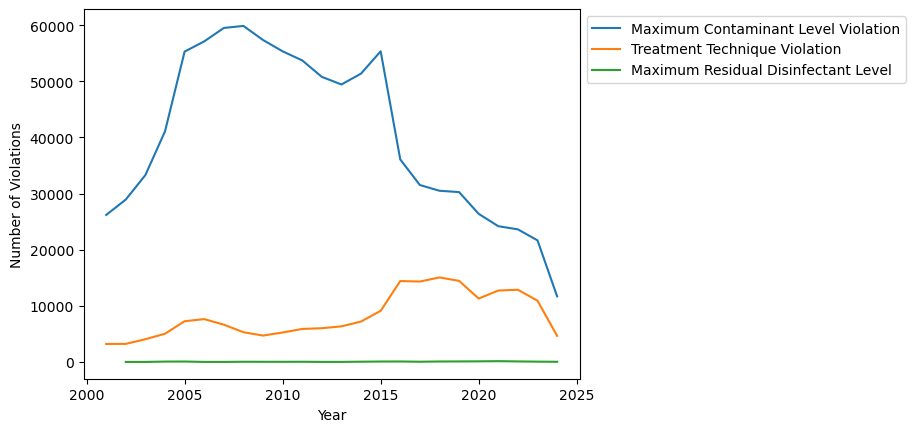

In [21]:
# make a plot of violation categories by year
sns.lineplot(data=health_cat, x='Year', y='VIOLATION_ID', hue='VIOLATION_CATEGORY_CODE')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.ylabel('Number of Violations')
#plt.savefig('num_viols_by_cat.png', bbox_inches='tight')

### Number of health-based violations  by year

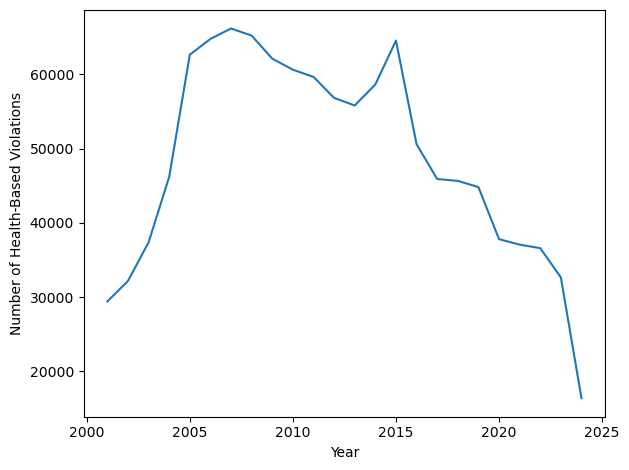

In [88]:
# make a plot of violation categories by year
sns.lineplot(data=pws_viols_health.groupby(['Year']).count(), x='Year', y='VIOLATION_ID')
plt.tight_layout()
plt.ylabel('Number of Health-Based Violations')
#plt.savefig('num_h_viols_by_year.png')

### Number of health-based violations by rule by year

In [31]:
health_rule = pws_viols_health.groupby(['Year', 'RULE_CODE'], as_index=False).count().rename(columns={'VIOLATION_ID':'num_viols_rule'})[['Year','RULE_CODE','num_viols_rule']]
health_rule['RULE_CODE'].unique()

array(['Arsenic Rule', 'Former Total Trihalomethane Rule',
       'Inorganic Chemicals',
       'Interim and Long Term 1 Enhanced Surface Water Treatment Rule',
       'Lead and Copper Rule', 'Nitrate Rule',
       'Radionuclides and Revised Rad Rule',
       'Surface Water Treatment Rule', 'Synthetic Organic Chemicals',
       'Total Coliform Rule', 'Volatile Organic Chemicals',
       'Stage 1 Disinfectants and Disinfection Byproducts Rule',
       'Long Term 2 Enhanced Surface Water Treatment Rule',
       'Ground Water Rule',
       'Stage 2 Disinfectants and Disinfection Byproducts Rule',
       'Revised Total Coliform Rule'], dtype=object)

In [35]:
# look at top 5 by year
# define a function to return top 5 violation counts
def year_top(df, n=5, column='num_viols_rule'):
  return df.sort_values(column, ascending=False)[:n]
# group by year and apply this function
health_rule_top = health_rule.groupby('Year').apply(year_top, include_groups=False)[['RULE_CODE','num_viols_rule']]

RULE_CODE  num_viols_rule
Year                                                                       
2001 9                                  Total Coliform Rule           22295
     7                         Surface Water Treatment Rule            2718
     5                                         Nitrate Rule            1784
     6                   Radionuclides and Revised Rad Rule            1333
     4                                 Lead and Copper Rule             485
...                                                     ...             ...
2024 312  Stage 2 Disinfectants and Disinfection Byprodu...            5332
     310                        Revised Total Coliform Rule            2890
     308                                       Nitrate Rule            1894
     302                                       Arsenic Rule            1449
     309                 Radionuclides and Revised Rad Rule            1112

[120 rows x 2 columns]

In [87]:
health_rule_top.iloc[100:120]

RULE_CODE  num_viols_rule
Year                                                                       
2021 270  Stage 2 Disinfectants and Disinfection Byprodu...           11968
     268                        Revised Total Coliform Rule            7144
     267                 Radionuclides and Revised Rad Rule            3262
     266                                       Nitrate Rule            3112
     260                                       Arsenic Rule            2881
2022 284  Stage 2 Disinfectants and Disinfection Byprodu...           11914
     282                        Revised Total Coliform Rule            6666
     280                                       Nitrate Rule            3143
     275                                  Ground Water Rule            2945
     281                 Radionuclides and Revised Rad Rule            2932
2023 298  Stage 2 Disinfectants and Disinfection Byprodu...           10181
     296                        Revised Total Coliform Rule            6331
     294                                       Nitrate Rule            3007
     295                 Radionuclides and Revised Rad Rule            2678
     288                                       Arsenic Rule            2563
2024 312  Stage 2 Disinfectants and Disinfection Byprodu...            5332
     310                        Revised Total Coliform Rule            2890
     308                                       Nitrate Rule            1894
     302                                       Arsenic Rule            1449
     309                 Radionuclides and Revised Rad Rule            1112

Text(50.722222222222186, 0.5, 'Rule Code')

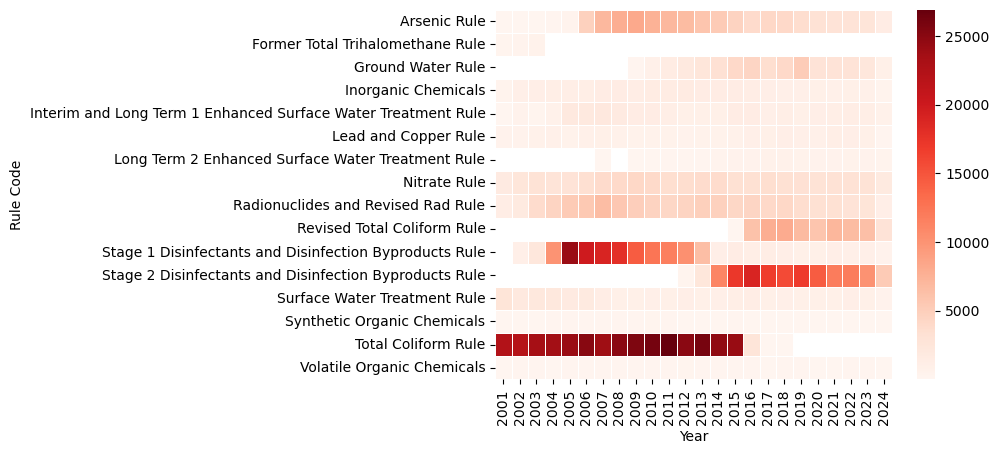

In [50]:
# grid plot 
health_rule_reformat = (health_rule.pivot(index='RULE_CODE', columns='Year', values='num_viols_rule'))
sns.heatmap(health_rule_reformat, linewidth=.5, cmap='Reds')
plt.ylabel('Rule Code')
#plt.savefig('num_viols_by_rule_heat.png', bbox_inches='tight')

In [54]:
# calculate values as a percentage
num_viols = pws_viols_health.groupby(['Year']).count().rename(columns={'VIOLATION_ID':'num_viols_tot_yr'})['num_viols_tot_yr'] # this is a series
num_viols

Year
2001    29402
2002    32164
2003    37359
2004    46184
2005    62635
2006    64764
2007    66167
2008    65209
2009    62100
2010    60619
2011    59647
2012    56817
2013    55796
2014    58630
2015    64538
2016    50581
2017    45890
2018    45641
2019    44806
2020    37791
2021    37052
2022    36578
2023    32632
2024    16365
Name: num_viols_tot_yr, dtype: int64

In [57]:
# calculate values as a percentage
for year in range(2001,2025):
    health_rule_reformat[year] = (health_rule_reformat[year] / num_viols[year]) * 100

In [58]:
# num_viols[2001]
# health_rule_top.loc[2001]
health_rule_reformat

Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
RULE_CODE,,,,,,,,,,,,,,,,,,,,,
Arsenic Rule,0.234678,0.323343,0.251613,0.339945,0.611479,7.468655,10.568713,11.986076,13.264090,12.438344,...,7.152375,7.635278,8.984528,8.937140,8.146230,8.115689,7.775559,7.906392,7.854253,8.854262
Former Total Trihalomethane Rule,0.901299,1.206318,1.450788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ground Water Rule,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.212560,1.369208,...,6.236636,8.726597,7.674875,8.788151,11.708253,7.533540,7.702688,8.051288,6.800074,5.255118
Inorganic Chemicals,1.081559,3.105957,2.931021,2.730383,2.008462,1.947069,2.165732,2.122406,2.181965,2.522311,...,2.237442,2.504893,2.355633,2.169102,2.138107,2.365643,2.164526,2.373011,2.555773,2.566453
Interim and Long Term 1 Enhanced Surface Water Treatment Rule,0.006802,1.532770,0.773575,1.407414,3.186717,3.049534,3.172276,2.648407,2.275362,2.309507,...,2.208001,2.872620,2.083243,2.581013,2.024282,2.841946,3.303465,3.540379,3.729468,4.430186
Lead and Copper Rule,1.649548,1.619823,1.911186,1.680236,0.868524,1.164227,1.302764,0.990661,1.012882,0.889160,...,1.135765,1.886084,1.847897,2.399159,2.285408,2.116906,3.173918,2.944393,2.843834,1.087687
Long Term 2 Enhanced Surface Water Treatment Rule,NaN,NaN,NaN,NaN,NaN,NaN,0.004534,NaN,0.025765,0.153417,...,0.658527,0.923272,1.420789,1.564383,1.229746,1.283374,1.360250,1.454426,1.572076,2.040941
Nitrate Rule,6.067614,7.632757,7.931154,6.136324,4.545382,5.211228,5.744555,6.017574,6.640902,6.468269,...,5.167498,6.532097,7.768577,7.309218,7.132973,8.017782,8.399007,8.592597,9.214881,11.573480
Radionuclides and Revised Rad Rule,4.533705,5.798408,9.903905,9.579075,8.439371,8.504725,9.888615,8.593906,8.009662,7.463007,...,6.527937,8.548665,8.777511,9.002870,8.050261,8.750761,8.803843,8.015747,8.206668,6.794989


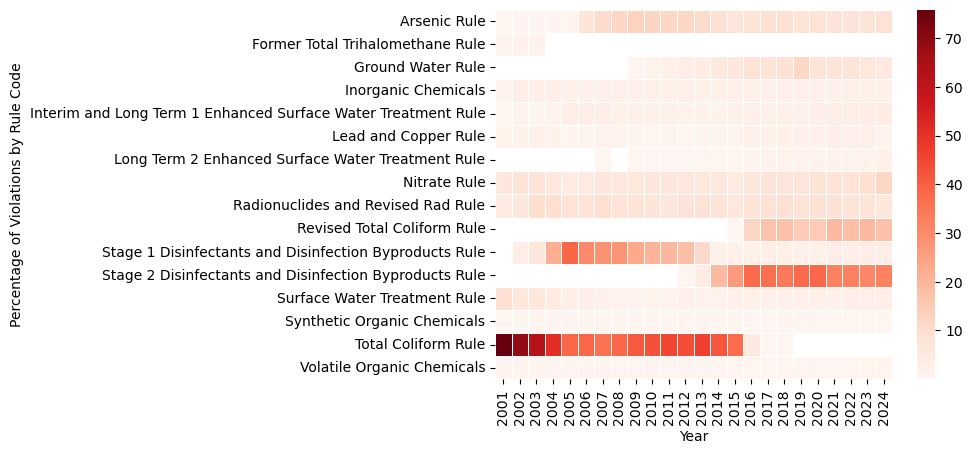

In [64]:
# grid plot 
sns.heatmap(health_rule_reformat, linewidth=.5, cmap='Reds')
plt.ylabel('Percentage of Violations by Rule Code')
#plt.savefig('num_viols_by_rule_heat_percent.png', bbox_inches='tight')

## Health-based violation hotspots

In [28]:
## import spatial data
# read in state boundaries dataset
file = r"C:\Users\jenni\Workspaces\Projects\EDGI\SOE Report\Data\boundaries\cb_2018_us_state_500k\cb_2018_us_state_500k.shp" # https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html
state_bds = gpd.read_file(file)
state_bds = state_bds.rename(columns={'STUSPS':'STATE_CODE'})
# read in the cws boundaries file
file = r"C:\Users\jenni\Workspaces\Projects\EDGI\SOE Report\Data\boundaries\EPA_CWS_Boundaries\CWS_Boundaries_Latest\SAB_1_1.gdb" # https://www.epa.gov/ground-water-and-drinking-water/community-water-system-service-area-boundaries?tab=map
cws_bds = gpd.read_file(file).to_crs(epsg=4269)
# filter the facilities df to include only CWS - only these have spatial data
sdwa_cws = sdwa_pws[sdwa_pws['PWS_TYPE_CODE']=='CWS']
# count pws by state
pws_count = pd.DataFrame(sdwa_cws['STATE_CODE'].value_counts()).rename(columns={'count':'num_pws'})

C:\Users\jenni\miniconda\envs\geo-env\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: organizePolygons() received a polygon with more than 100 parts. The processing may be really slow.  You can skip the processing by setting METHOD=SKIP, or only make it analyze counter-clock wise parts by setting METHOD=ONLY_CCW if you can assume that the outline of holes is counter-clock wise defined
  return ogr_read(


In [29]:
# Reminder: duration fields in the violations dfs: 
# duration of non-compliance : pws_viols['non_compl_duration'] 
# duration of violation reporting period : pws_viols['viol_report_duration']

## Hotspots by state

### Mean duration of violation non-compliance by state

In [30]:
# mean duration of violation non-compliance by state - time series
non_compl_dur_by_state = cws_viols_health.groupby(['Year','STATE_CODE'], as_index=False)['non_compl_duration'].mean().rename(columns={'non_compl_duration':'mean_non_compl_duration'})
non_compl_dur_by_state['mean_non_compl_duration'] = non_compl_dur_by_state['mean_non_compl_duration'].dt.days

C:\Users\jenni\AppData\Local\Temp\ipykernel_28552\1854431355.py:2: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


Text(17.597222222222214, 0.5, 'Mean Duration of Non-Compliance by Year')

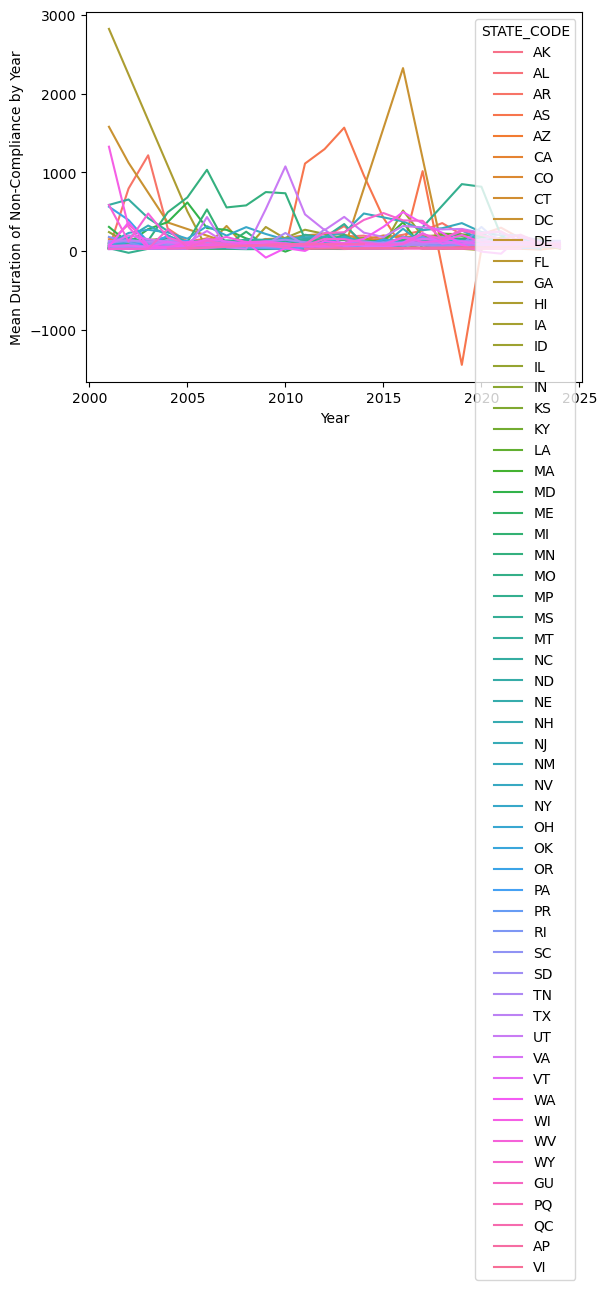

In [31]:
sns.lineplot(data=non_compl_dur_by_state, x='Year', y='mean_non_compl_duration', hue='STATE_CODE')
plt.tight_layout()
plt.ylabel('Mean Duration of Non-Compliance by Year')
#plt.savefig('mean_dur_non_comp_by_year.png')

In [32]:
# mean duration of violation non-compliance by state - over all the years
mean_non_compl_dur_by_state = non_compl_dur_by_state.groupby('STATE_CODE', as_index=False)['mean_non_compl_duration'].mean()
mean_non_compl_dur_by_state.sort_values(by='mean_non_compl_duration', ascending=False)

,STATE_CODE,mean_non_compl_duration
9,DC,441.923077
26,MN,280.333333
14,HI,277.000000
4,AS,267.200000
51,UT,239.708333
3,AR,237.250000
36,NM,186.791667
31,NC,178.333333
58,WY,174.250000
23,MD,166.541667


In [33]:
# join violations stats to state boundaries
state_bds = state_bds.merge(mean_non_compl_dur_by_state, on='STATE_CODE')

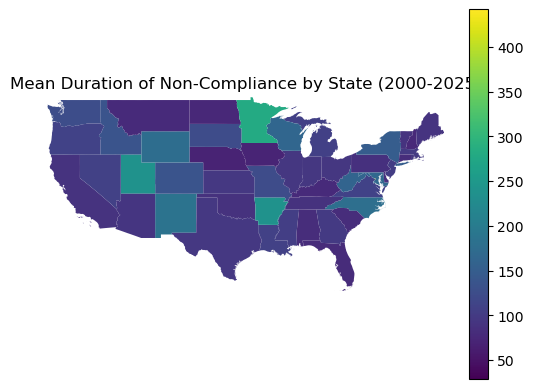

In [34]:
# plot
fig, ax = plt.subplots()
ax.set_xlim([-124.725839, -66.949895])
ax.set_ylim([24.498131, 49.384358])
state_bds.plot(column='mean_non_compl_duration', legend=True, ax=ax)
ax.set_axis_off()
plt.title('Mean Duration of Non-Compliance by State (2000-2025)')
#plt.savefig('mean_dur_non_comp_state.png', bbox_inches='tight')
plt.show()

### Number of violations per year by state

In [35]:
# number of violations per year by state
viols_by_year_state = pws_viols_health.groupby(['Year', 'STATE_CODE'], as_index=False)['VIOLATION_ID'].count().rename(columns={'VIOLATION_ID':'num_viols'})

In [36]:
## normalize violation counts by number of cws in each state
viols_by_year_state = viols_by_year_state.merge(pws_count, left_on='STATE_CODE', right_on='STATE_CODE')
viols_by_year_state['viols_per_cws'] = viols_by_year_state['num_viols'] / viols_by_year_state['num_pws']
# median number of normalized violations in each state over the time span
viols_by_year_state_median = pd.DataFrame(viols_by_year_state.groupby('STATE_CODE')['viols_per_cws'].mean()).rename(columns={'viols_per_cws':'avg_ann_viols_per_cws'}).sort_values(by='avg_ann_viols_per_cws', ascending=False)
viols_by_year_state_median

,avg_ann_viols_per_cws
STATE_CODE,
PQ,18.833333
AP,7.000000
OK,4.722785
QC,4.000000
GU,2.642857
RI,2.454749
LA,2.378560
ME,2.164840
NM,2.154187


In [37]:
# join violations stats to state boundaries
state_bds = state_bds.merge(viols_by_year_state_median, on='STATE_CODE')

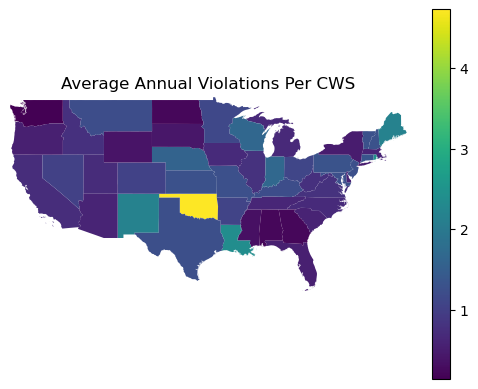

In [38]:
# plot
fig, ax = plt.subplots()
ax.set_xlim([-124.725839, -66.949895])
ax.set_ylim([24.498131, 49.384358])
state_bds.plot(column='avg_ann_viols_per_cws', legend=True, ax=ax)
ax.set_axis_off()
plt.title('Average Annual Violations Per CWS')
#plt.savefig('avg_ann_viols_per_cws.png', bbox_inches='tight')
plt.show()

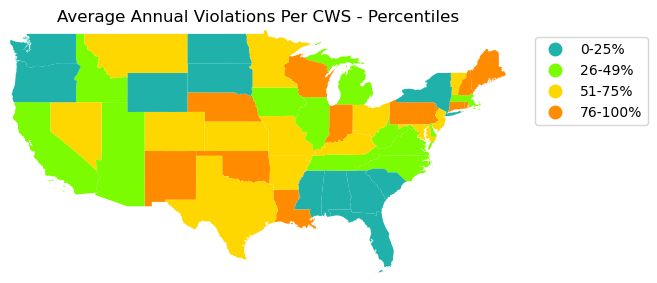

In [39]:
# bin the values
state_bds['viols_percentile'] = pd.qcut(state_bds['avg_ann_viols_per_cws'], 
                                        [0, 0.25, 0.5, 0.75, 1], 
                                        labels=['0-25%', '26-49%', '51-75%', '76-100%'])
# plot
fig, ax = plt.subplots()
ax.set_xlim([-124.725839, -66.949895])
ax.set_ylim([24.498131, 49.384358])
from matplotlib import colors
cmap = colors.ListedColormap(["lightseagreen", "lawngreen", "gold", "darkorange"])
state_bds.plot(column='viols_percentile', legend=True, ax=ax, legend_kwds={'bbox_to_anchor': (1.3, 1)}, cmap=cmap)
ax.set_axis_off()
plt.title('Average Annual Violations Per CWS - Percentiles')
#plt.savefig('avg_ann_viols_per_cws_percentiles.png', bbox_inches='tight')
plt.show()

## Hotspots by water system

### Mean duration of non-compliance by PWS

In [40]:
# mean duration of non-compliance by pws - by year
non_compl_dur_by_pws = cws_viols_health.groupby(['Year','PWSID'], as_index=False)['non_compl_duration'].mean().rename(columns={'non_compl_duration':'mean_non_compl_duration'})
non_compl_dur_by_pws['mean_non_compl_duration'] = non_compl_dur_by_pws['mean_non_compl_duration'].dt.days
# mean duration of non-compliance by pws - over all the years
mean_non_compl_dur_by_pws = non_compl_dur_by_pws.groupby('PWSID', as_index=False)['mean_non_compl_duration'].mean()
mean_non_compl_dur_by_pws.sort_values(by='mean_non_compl_duration', ascending=False)
# drop negative values ## something needs to be fixed with those dates!
mean_non_compl_dur_by_pws.drop(mean_non_compl_dur_by_pws.index[mean_non_compl_dur_by_pws['mean_non_compl_duration'] < 0], inplace = True)
# join violations stats to cws boundaries
cws_bds = cws_bds.merge(mean_non_compl_dur_by_pws, on='PWSID')
mean_non_compl_dur_by_pws.describe()

,mean_non_compl_duration
count,25035.000000
mean,119.912336
std,253.703610
min,0.000000
25%,29.500000
50%,49.333333
75%,90.200000
max,5472.000000


<Axes: ylabel='Frequency'>

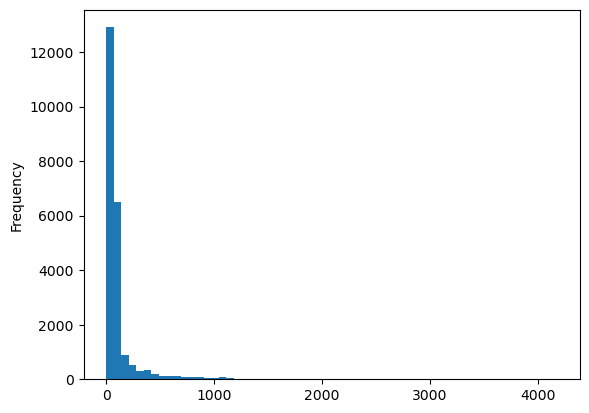

In [41]:
# look at a histogram of values
cws_bds['mean_non_compl_duration'].plot.hist(bins=60)

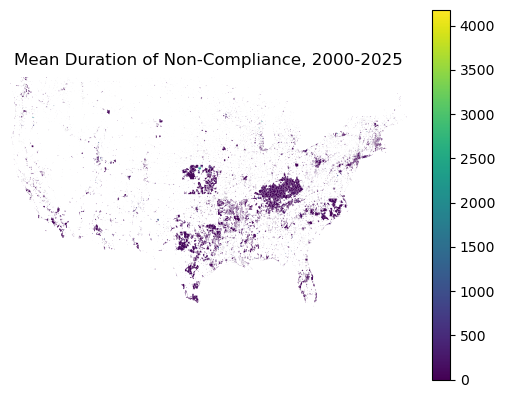

In [42]:
# plot
fig, ax = plt.subplots()
ax.set_xlim([-124.725839, -66.949895])
ax.set_ylim([24.498131, 49.384358])
cws_bds.plot(column='mean_non_compl_duration', legend=True, ax=ax)
ax.set_axis_off()
plt.title('Mean Duration of Non-Compliance, 2000-2025')
#plt.savefig('mean_dur_non_compl_per_cws.png', bbox_inches='tight')
plt.show()

In [43]:
# bin the values
cws_bds['mean_non_compl_duration_binned'] = pd.qcut(cws_bds['mean_non_compl_duration'], 
                                                    [0, 0.25, 0.5, 0.75, 1], 
                                                    labels=['0-25%', '26-49%', '51-75%', '76-100%'])

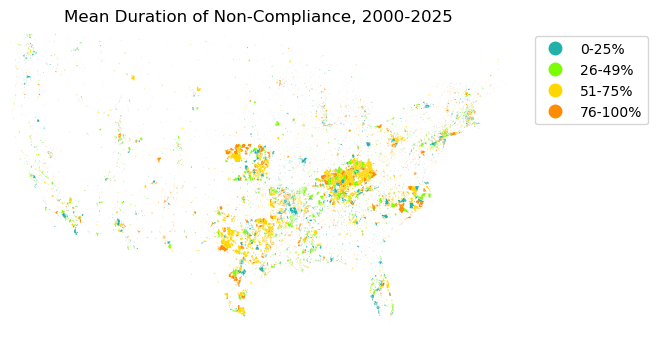

In [44]:
# plot
fig, ax = plt.subplots()
ax.set_xlim([-124.725839, -66.949895])
ax.set_ylim([24.498131, 49.384358])
cmap = colors.ListedColormap(["lightseagreen", "lawngreen", "gold", "darkorange"])
cws_bds.plot(column='mean_non_compl_duration_binned', legend=True, ax=ax, legend_kwds={'bbox_to_anchor': (1.3, 1)}, cmap=cmap)
ax.set_axis_off()
plt.title('Mean Duration of Non-Compliance, 2000-2025')
#plt.savefig('mean_dur_non_compl_per_cws_binned.png', bbox_inches='tight')
plt.show()

In [ ]:
# interactive map
# cws_bds.explore('mean_non_compl_duration_binned', cmap=cmap, tooltip=False)

### Number of violations per year by CWS

In [46]:
# hotspots by water system
# count number of violations per year by cws
viols_per_yr_cws = cws_viols_health.groupby(['Year', 'PWSID'], as_index=False).count()
# write a function to return the top 10% only for each year
def year_top(df, n=494, column='VIOLATION_ID'):
  return df.sort_values(column, ascending=False)[:n]
# group by year and apply this function
viols_per_yr_cws_top = viols_per_yr_cws.groupby('Year').apply(year_top, include_groups=False)
# count the number of years in violation for each pws
# return sorted most to least
viols_per_yr_cws_top = pd.DataFrame(viols_per_yr_cws_top.groupby('PWSID').count().sort_values(by=['VIOLATION_ID'], ascending=False).rename(columns={'VIOLATION_ID':'num_yrs_top_ten_per_viol'}))
viols_per_yr_cws_top['num_yrs_top_ten_per_viol']

PWSID
OK2000908    23
OK2003703    23
TX1530005    23
TX1100010    23
TX2230003    22
             ..
WV3301314     1
WV3301310     1
WV3301309     1
AK2280155     1
AK2280066     1
Name: num_yrs_top_ten_per_viol, Length: 4022, dtype: int64

In [47]:
# hotspots by water system
viols_per_cws = pd.DataFrame(cws_viols_health.groupby('PWSID').count().rename(columns={'VIOLATION_ID':'viol_count'}).sort_values(by='viol_count', ascending=False)['viol_count'])
viols_per_cws['viol_count_per_yr'] = viols_per_cws['viol_count'] / 25
viols_per_cws['viol_count_per_yr']

PWSID
TX1540001    108.76
WI2680238     95.40
TX1520005     78.64
OK1021304     70.00
CO0150800     61.88
              ...  
WY5601454      0.04
WY5601357      0.04
WY5601494      0.04
055294404      0.04
055293802      0.04
Name: viol_count_per_yr, Length: 25140, dtype: float64

In [48]:
# join the violation consistency measure to cws boundaries
cws_bds = cws_bds.merge(viols_per_cws, on='PWSID')

In [49]:
# truncate the red colormap # https://gist.github.com/salotz/4f585aac1adb6b14305c
import numpy as np
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

#arr = np.linspace(0, 50, 100).reshape((10, 10))
#fig, ax = plt.subplots(ncols=2)
cmap = plt.get_cmap('Reds')
reds_trunc = truncate_colormap(cmap, 0.4, 1)
#ax[0].imshow(arr, interpolation='nearest', cmap=cmap)
#ax[1].imshow(arr, interpolation='nearest', cmap=reds_trunc)
#plt.show()

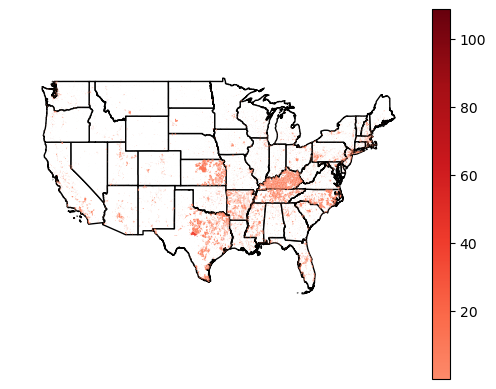

In [50]:
# map the results
# plot
fig, ax = plt.subplots()
ax.set_xlim([-130, -65])
ax.set_ylim([22, 50])
state_bds.plot(color='white', 
               edgecolor='black',
               ax=ax)
cws_bds.plot(column='viol_count_per_yr', 
             cmap=reds_trunc, 
             legend=True, 
             #missing_kwds={'color': 'grey'}, # not working
             ax=ax)
ax.set_axis_off()
#plt.savefig('cws_viol_count_per_year.png', bbox_inches='tight')
plt.show()

In [51]:
# this takes a long time to execute so only decomment if desired
#cws_bds.explore('viol_count_per_yr', cmap='YlOrRd', tooltip=False)

# Enforcement

## Enforcement over time

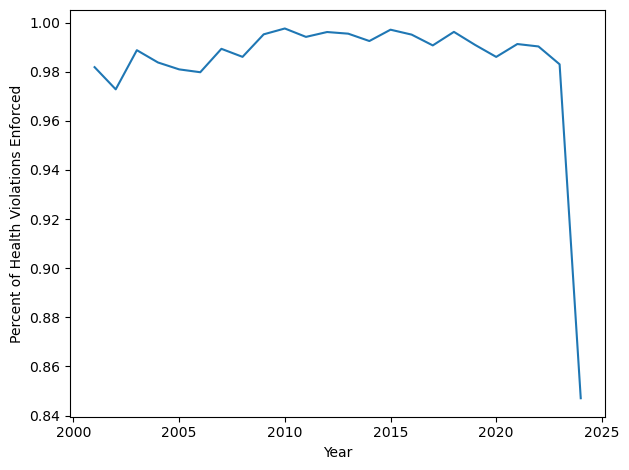

In [52]:
# what percentage of violations were enforced?
pws_viols_enf = pd.DataFrame(pws_viols.groupby(['Year'])[['ENFORCEMENT_ID']].count().rename(columns={'ENFORCEMENT_ID':'num_enfs'})['num_enfs'] / pws_viols.groupby(['Year'])[['VIOLATION_ID']].count().rename(columns={'VIOLATION_ID':'num_viols'})['num_viols'], columns=['percent_viols_enf'])
sns.lineplot(data=pws_viols_enf, x='Year', y='percent_viols_enf')
plt.tight_layout()
plt.ylabel('Percent of Health Violations Enforced')
#plt.savefig('per_health_viols_enf_by_year.png')

In [53]:
# number of enforcement actions - by type 
viols_enf_type = pws_viols.groupby(['Year', 'ENFORCEMENT_ACTION_TYPE_CODE'], as_index=False).count()[['Year', 'ENFORCEMENT_ACTION_TYPE_CODE','ENFORCEMENT_ID',]].rename(columns={'ENFORCEMENT_ID':'num_enfs'})
viols_enf_type['ENFORCEMENT_ACTION_TYPE_CODE'].unique()

array(['Federal Bilateral Compliance Agreement signed',
       'Federal Civil Case filed',
       'Federal Complaint for Penalty Consent Order or Consent Decree',
       'Federal Complaint for Penalty issued',
       'Federal Compliance achieved',
       'Federal Final Administrative Order issued',
       'Federal Intentional no-action', 'Federal Other',
       'Federal Proposed Administrative Order Issued',
       'Federal Public Notification received from PWS',
       'Federal Public Notification requested',
       'Federal SDWA Section 1431 (Emergency) Order',
       'Federal Site Visit for Enforcement purposes',
       'Federal Technical Assistance Visit',
       'Federal Violation/Reminder Notice',
       'Federal issued Formal Notice of Violation',
       'State Administrative Penalty assessed',
       'State Administrative/Compliance Order with penalty issued',
       'State Administrative/Compliance Order without penalty issued',
       'State Bilateral Compliance Agreement sig

Text(50.722222222222186, 0.5, 'Enforcement Action Type')

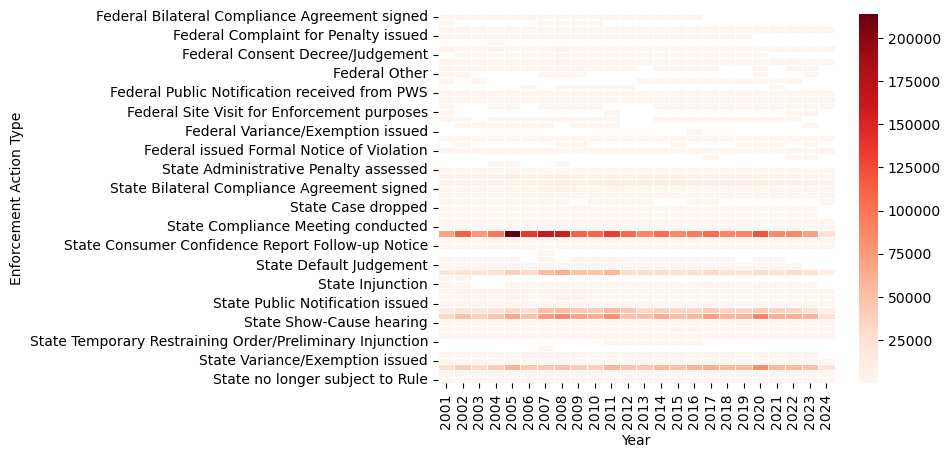

In [54]:
# there are a lot of types - plot using a heatmap
viols_enf_type_reformat = (viols_enf_type.pivot(index='ENFORCEMENT_ACTION_TYPE_CODE', columns='Year', values='num_enfs'))
sns.heatmap(viols_enf_type_reformat, linewidth=.5, cmap='Reds')
plt.ylabel('Enforcement Action Type')

In [55]:
# normalize the above plot
viols_enf_type = pws_viols.groupby(['Year', 'ENFORCEMENT_ACTION_TYPE_CODE'], as_index=False).count()[['Year', 'ENFORCEMENT_ACTION_TYPE_CODE','ENFORCEMENT_ID',]].rename(columns={'ENFORCEMENT_ID':'num_enfs'})
viols_enf_type

,Year,ENFORCEMENT_ACTION_TYPE_CODE,num_enfs
0,2001,Federal Bilateral Compliance Agreement signed,13
1,2001,Federal Civil Case filed,14
2,2001,Federal Complaint for Penalty Consent Order or...,6
3,2001,Federal Complaint for Penalty issued,79
4,2001,Federal Compliance achieved,2777
...,...,...,...
1041,2024,State Technical Assistance Visit,319
1042,2024,State Variance/Exemption issued,15
1043,2024,State Violation/Reminder Notice,24243
1044,2024,State no additional Formal Action needed,10


In [58]:
# only a few of the action types are common
# filter the dataset for the top 10 action types, then regroup by year and replot

# filter the dataset for the top 10 action types over the entire duration 2001-2024
viols_enf_type_top10 = pws_viols.groupby(['ENFORCEMENT_ACTION_TYPE_CODE'], as_index=False).count()[['ENFORCEMENT_ACTION_TYPE_CODE','ENFORCEMENT_ID',]]
viols_enf_type_top10_vals = list(viols_enf_type_top10.sort_values(by='ENFORCEMENT_ID',ascending=False).head(10)['ENFORCEMENT_ACTION_TYPE_CODE'])
viols_enf_type_top10_vals

['State Compliance achieved',
 'State Public Notification requested',
 'State Violation/Reminder Notice',
 'State Public Notification received',
 'State Formal Notice of Violation issued',
 'State Administrative/Compliance Order without penalty issued',
 'State Administrative/Compliance Order with penalty issued',
 'Federal Final Administrative Order issued',
 'State Intentional no-action',
 'State Other']

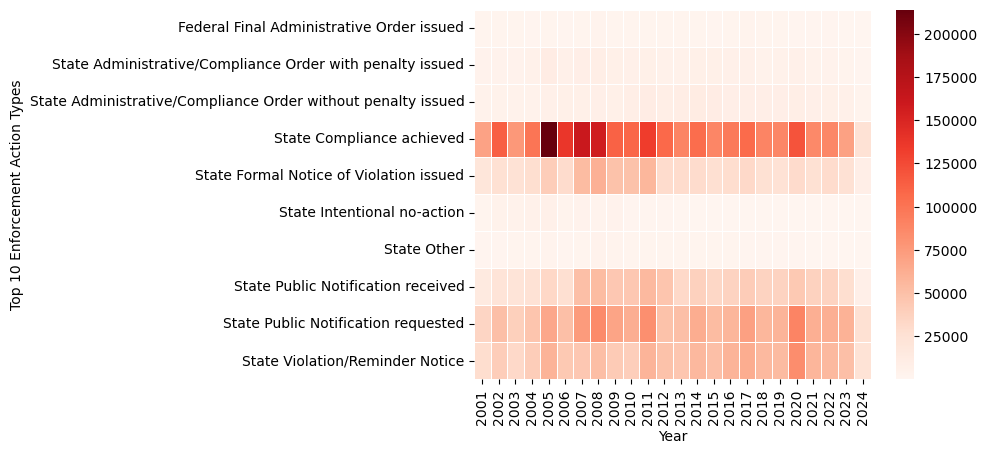

In [59]:
# recreate the viols top 10 df by filtering for only these enforcement types
viols_enf_type_top10 = pws_viols[pws_viols['ENFORCEMENT_ACTION_TYPE_CODE'].isin(viols_enf_type_top10_vals)]
viols_enf_type_top10['ENFORCEMENT_ACTION_TYPE_CODE'].unique()
# group just the top 10 by year 
viols_enf_type_top10 = viols_enf_type_top10.groupby(['Year', 'ENFORCEMENT_ACTION_TYPE_CODE'], as_index=False).count()[['Year', 'ENFORCEMENT_ACTION_TYPE_CODE','ENFORCEMENT_ID',]].rename(columns={'ENFORCEMENT_ID':'num_enfs'})
# plot heatmap
viols_enf_type_top10_reformat = (viols_enf_type_top10.pivot(index='ENFORCEMENT_ACTION_TYPE_CODE', columns='Year', values='num_enfs'))
sns.heatmap(viols_enf_type_top10_reformat, linewidth=.5, cmap='Reds')
plt.ylabel('Top 10 Enforcement Action Types')
#plt.savefig('num_viols_by_enf_type_top10_heat.png', bbox_inches='tight')

In [60]:
# it looks like most enforcement is led by states

## Enforcement by states

In [61]:
# number of enforcement actions by state 
viols_enf_state = pws_viols.groupby(['Year', 'STATE_CODE'], as_index=False).count()[['Year','STATE_CODE','ENFORCEMENT_ID']].rename(columns={'ENFORCEMENT_ID':'num_enfs'})
## normalize violation counts by number of cws in each state
viols_enf_state = viols_enf_state.merge(pws_count, left_on='STATE_CODE', right_on='STATE_CODE')
viols_enf_state['viols_per_cws'] = viols_enf_state['num_enfs'] / viols_enf_state['num_pws']
viols_enf_state

,Year,STATE_CODE,num_enfs,num_pws,viols_per_cws
0,2001,AK,7919,405,19.553086
1,2001,AL,877,539,1.627087
2,2001,AR,393,669,0.587444
3,2001,AS,25,10,2.500000
4,2001,AZ,8494,945,8.988360
...,...,...,...,...,...
1321,2024,VT,2016,380,5.305263
1322,2024,WA,1122,2276,0.492970
1323,2024,WI,1751,982,1.783096
1324,2024,WV,1826,430,4.246512


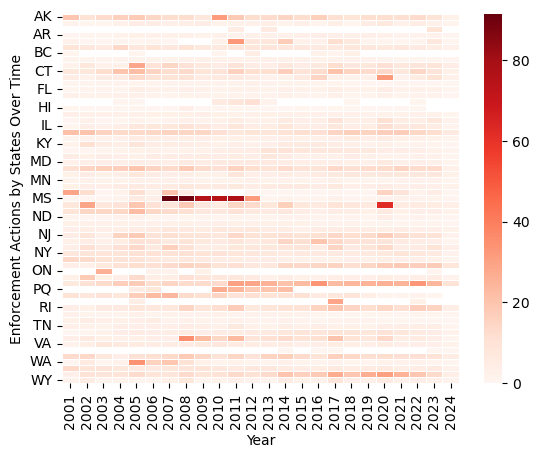

In [62]:
# plot heatmap
viols_enf_state_reformat = (viols_enf_state.pivot(index='STATE_CODE', columns='Year', values='viols_per_cws'))
sns.heatmap(viols_enf_state_reformat, linewidth=.5, cmap='Reds')
plt.ylabel('Enforcement Actions by States Over Time')
#plt.savefig('num_enfs_by_state_heat.png', bbox_inches='tight')

In [63]:
## number of enforcement actions - by category

In [64]:
viols_enf_cat = pws_viols.groupby(['Year', 'ENF_ACTION_CATEGORY'], as_index=False).count().rename(columns={'count':'num_enfs'})
viols_enf_cat['ENF_ACTION_CATEGORY'].unique()

array(['Formal', 'Informal', 'Resolving'], dtype=object)

In [65]:
# doesn't seem that interesting

# Future topics ...

In [66]:
# PERCENTAGE OF VIOLATIONS WITH ENFORCEMENT ACTION BY TYPE? I.E., WHAT VIOLATIONS ARE ENFORCED?

In [67]:
# how do enforcements correlate with rule violation trends? 

In [68]:
# Number of people served by CWSs with health-based violations by year
# top 10 contaminants by year

In [69]:
## NCOD National Contaminant Occurrence Database
"""
NCOD includes information about unregulated contaminants
  Acronyms:
  PWS Public Water Supply
  UCMR Unregulated Contaminant Monitoring Rule

 UCMR 5 active 2023-2025
 focuses on PFAS
 PWSs serving > 3,300 people required to mointor (subject to funding)
 'nationally representative sample' of PWSs serving < 3,300
 UCMR 5 data (partial) was published October 2024
 Access: https://www.epa.gov/system/files/other-files/2023-08/ucmr5-occurrence-data.zip

 UCMR 4 active 2018-2020
 final dataset published January 2022
 30 chemical contaminants
 PWSs serving > 10,000 people required to monitor
 'nationally representative sample' of PWSs serving <10,000
 Access: https://www.epa.gov/system/files/other-files/2024-04/ucmr4-occurrence-data.zip
"""

"\nNCOD includes information about unregulated contaminants\n  Acronyms:\n  PWS Public Water Supply\n  UCMR Unregulated Contaminant Monitoring Rule\n\n UCMR 5 active 2023-2025\n focuses on PFAS\n PWSs serving > 3,300 people required to mointor (subject to funding)\n 'nationally representative sample' of PWSs serving < 3,300\n UCMR 5 data (partial) was published October 2024\n Access: https://www.epa.gov/system/files/other-files/2023-08/ucmr5-occurrence-data.zip\n\n UCMR 4 active 2018-2020\n final dataset published January 2022\n 30 chemical contaminants\n PWSs serving > 10,000 people required to monitor\n 'nationally representative sample' of PWSs serving <10,000\n Access: https://www.epa.gov/system/files/other-files/2024-04/ucmr4-occurrence-data.zip\n"